In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [5]:
data_train = pd.read_csv("D:/data ANALYTICS AND SCIENCE/PROJECT SUBMISSION DATA/retail/store_train.csv", encoding='latin-1')

data_train


,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type,store
0,2300919770,848,588,666,1116,1133,9,23,19770,Hancock County,NCNTY23009N23009,"Hancock County, ME",Eastbrook town,423.0,ME,Supermarket Type1,0
1,5000129575,925,717,780,1283,1550,1,50,29575,Addison County,NCNTY50001N50001,"Addison County, VT",Granville town,298.0,VT,Supermarket Type1,0
2,2501308470,924,616,739,1154,1314,13,25,8470,Hampden County,METRO44140M44140,"Springfield, MA HUD Metro FMR Area",Brimfield town,3609.0,MA,Supermarket Type1,1
3,603599999,924,646,683,1292,1297,35,6,99999,Lassen County,NCNTY06035N06035,"Lassen County, CA",Lassen County,34895.0,CA,Supermarket Type3,0
4,5002760100,1017,730,735,1208,1326,27,50,60100,Windsor County,NCNTY50027N50027,"Windsor County, VT",Rochester town,1139.0,VT,Supermarket Type1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,2502354415,1133,862,867,1446,1531,23,25,54415,Plymouth County,METRO14460MM1200,"Brockton, MA HUD Metro FMR Area",Plympton town,2820.0,MA,Supermarket Type1,1
3334,4814599999,643,432,475,887,891,145,48,99999,Falls County,NCNTY48145N48145,"Falls County, TX",Falls County,17866.0,TX,Grocery Store,0
3335,2122399999,737,507,592,1020,1154,223,21,99999,Trimble County,METRO31140M31140,"Louisville, KY-IN HUD Metro FMR Area",Trimble County,8809.0,KY,Supermarket Type3,1
3336,2104599999,558,410,412,760,782,45,21,99999,Casey County,NCNTY21045N21045,"Casey County, KY",Casey County,15955.0,KY,Grocery Store,0


In [7]:
data_test = pd.read_csv("D:/data ANALYTICS AND SCIENCE/PROJECT SUBMISSION DATA/retail/store_test.csv", encoding='latin-1')

data_test

,Id,sales0,sales1,sales2,sales3,sales4,country,State,CouSub,countyname,storecode,Areaname,countytownname,population,state_alpha,store_Type
0,101799999,696,511,514,867,1034,17.0,1,99999,Chambers County,NCNTY01017N01017,"Chambers County, AL",Chambers County,34215.0,AL,Supermarket Type1
1,101999999,599,481,500,883,894,19.0,1,99999,Cherokee County,NCNTY01019N01019,"Cherokee County, AL",Cherokee County,25989.0,AL,Supermarket Type1
2,102199999,599,423,475,802,1061,21.0,1,99999,Chilton County,METRO13820N01021,"Chilton County, AL HUD Metro FMR Area",Chilton County,43643.0,AL,Supermarket Type1
3,103599999,599,459,462,883,886,35.0,1,99999,Conecuh County,NCNTY01035N01035,"Conecuh County, AL",Conecuh County,13228.0,AL,Supermarket Type1
4,103799999,599,481,505,746,801,37.0,1,99999,Coosa County,NCNTY01037N01037,"Coosa County, AL",Coosa County,11539.0,AL,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2202599999,627,493,524,924,1010,25.0,22,99999,Catahoula Parish,NCNTY22025N22025,"Catahoula Parish, LA",Catahoula Parish,10407.0,LA,Supermarket Type1
1427,4826999999,651,461,506,811,944,269.0,48,99999,King County,NCNTY48269N48269,"King County, TX",King County,286.0,TX,Supermarket Type1
1428,2301333840,922,743,748,1182,1232,13.0,23,33840,Knox County,NCNTY23013N23013,"Knox County, ME",Hope town,1536.0,ME,Supermarket Type3
1429,1908199999,593,402,438,739,862,81.0,19,99999,Hancock County,NCNTY19081N19081,"Hancock County, IA",Hancock County,11341.0,IA,Supermarket Type1


In [9]:
#Building the pipeline
fill_with_zero = SimpleImputer(strategy='constant', fill_value=0)

dp_pipe = ColumnTransformer([
('drop_vars', 'drop', ['storecode', 'Areaname', 'countytownname', 'countyname']),
('to_dummies', OneHotEncoder(handle_unknown='ignore'), ['state_alpha', 'store_Type']),
('fill_zero', fill_with_zero, ['sales0', 'sales1', 'sales2', 'sales3', 'sales4', 'country',
'State', 'CouSub', 'population', 'Id'])
])

In [10]:
#Preparing the pipeline
train = dp_pipe.fit_transform(data_train)
test = dp_pipe.transform(data_test)

In [11]:
#Random Forest model
rf_model = RandomForestClassifier()


In [13]:
#Tuning the parameters
param_grid = {
'n_estimators': [100, 500],
'max_features': [5, 25],
'min_samples_leaf': [2, 10]
}

rf_grid_search = GridSearchCV(rf_model, param_grid, scoring='roc_auc', cv=10)
rf_grid_search.fit(train, data_train['store'])

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [5, 25], 'min_samples_leaf': [2, 10],
                         'n_estimators': [100, 500]},
             scoring='roc_auc')

In [15]:
#Get the best model
best_rf_model = rf_grid_search.best_estimator_


In [17]:
#Variable importance
# Extract the feature names after preprocessing
feature_names = dp_pipe.transformers_[2][1].get_feature_names_out()

# Compute the variable importance for the target variable 'store'
importances = best_rf_model.feature_importances_

In [23]:
# Variable importance
import numpy as np

# Get the feature names after transformation
feature_names = dp_pipe.transformers_[2][1].get_feature_names_out()

# Ensure the number of features matches the number of importances
num_features = len(feature_names)
importances = importances[:num_features]

# Create the DataFrame for variable importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)


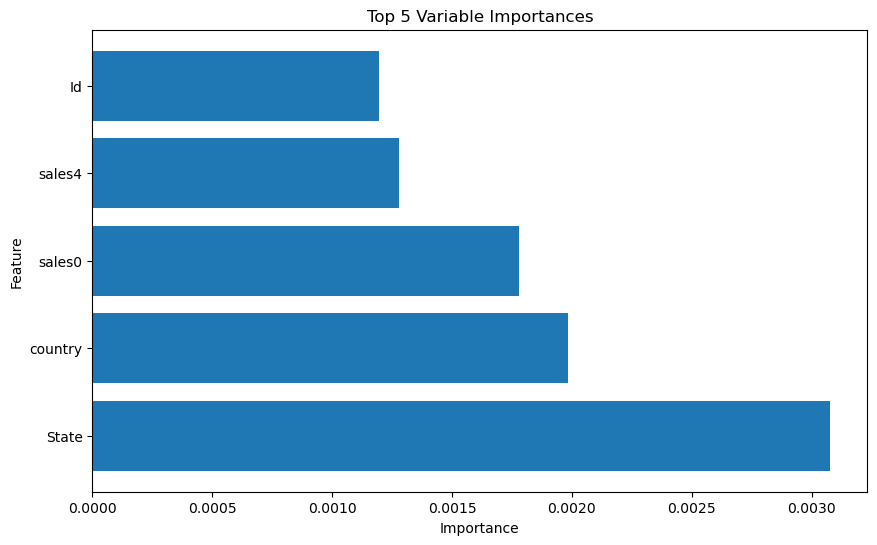

In [25]:
import matplotlib.pyplot as plt

# Select the top 5 variable importances
top_importances = importance_df.head(5)

# Plot the top 5 variable importances
plt.figure(figsize=(10, 6))
plt.barh(top_importances['Feature'], top_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Variable Importances')
plt.show()

In [26]:
#Make predictions
train_pred = best_rf_model.predict_proba(train)[:, 1]
test_pred = best_rf_model.predict_proba(test)[:, 1]

train_pred_df = pd.DataFrame({'Probability': train_pred})
test_pred_df = pd.DataFrame({'Probability': test_pred})

test_pred_df

,Probability
0,0.311913
1,0.168956
2,0.273479
3,0.114196
4,0.290920
...,...
1426,0.201882
1427,0.281237
1428,0.208845
1429,0.056992


In [29]:
# Filter data_train for Supermarket Type1, Kennebec County, and ME, and calculate total sales
total_sales = data_train.loc[(data_train['store_Type'] == 'Supermarket Type1') & 
                             (data_train['countyname'] == 'Kennebec County') & 
                             (data_train['state_alpha'] == 'ME'), 
                             ['sales0', 'sales1', 'sales2', 'sales3', 'sales4']].sum(axis=1).sum()
print('Total Sales:', total_sales)



Total Sales: 38680


# Filter data_test for Supermarket Type1, Kennebec County, and ME
# chceking the table 
table_data = data_test.loc[(data_test['store_Type'] == 'Supermarket Type1') & 
                           (data_test['countyname'] == 'Kennebec County') & 
                           (data_test['state_alpha'] == 'ME')]
print(table_data)


In [31]:
# Find out the number of unique categories of variable "Areaname"
num_unique_categories = data_train['Areaname'].nunique()
print('Number of Unique Categories:', num_unique_categories)


Number of Unique Categories: 1891


In [35]:
#For store type grocery store what is the response rate ? [ what % of obs have response value as 1 ] 
# Filter data_train for store type "Grocery Store"
grocery_store_data = data_train[data_train['store_Type'] == 'Grocery Store']

# Calculate the total number of observations with store type "Grocery Store"
total_observations = len(grocery_store_data)

# Calculate the number of observations with response value as 1
response_1_observations = len(grocery_store_data[grocery_store_data['store'] == 1])

# Calculate the response rate as a percentage
response_rate = (response_1_observations / total_observations) * 100

# Round off to two decimal places
response_rate = round(response_rate, 2)

print('Response Rate:', response_rate)




Response Rate: 42.13


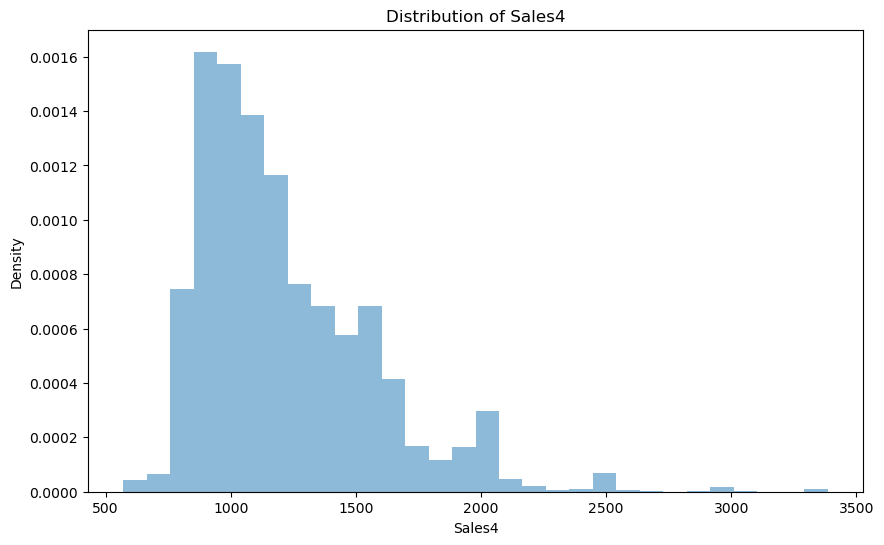

In [38]:
#Do all the sales variable follow normal distribution?
import matplotlib.pyplot as plt
import scipy.stats as stats

# Plot histogram and density plot
plt.figure(figsize=(10, 6))
plt.hist(data_train['sales4'], bins=30, density=True, alpha=0.5)
plt.title('Distribution of Sales4')
plt.xlabel('Sales4')
plt.ylabel('Density')
plt.show()


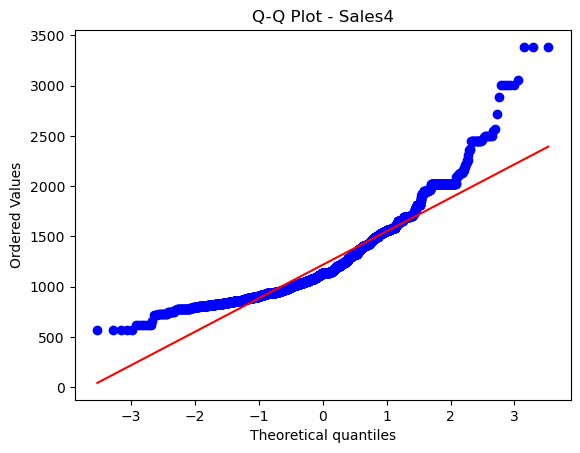

In [37]:
# Q-Q plot
stats.probplot(data_train['sales4'], dist='norm', plot=plt)
plt.title('Q-Q Plot - Sales4')
plt.show()

**As seen fro the histogram and q-q plot all sales variable do not follow normal distruibution** 

In [40]:
# Number of outliers for total sales based on following limits (q1-1.5*IQR, q3+1.5*IQR)?
import numpy as np

#Calculate quartiles and IQR
sales_q1 = np.percentile(data_train['sales0'], 25)
sales_q3 = np.percentile(data_train['sales0'], 75)
sales_iqr = sales_q3 - sales_q1

#Calculate lower and upper limits
lower_limit = sales_q1 - 1.5 * sales_iqr
upper_limit = sales_q3 + 1.5 * sales_iqr

#Count outliers in sales0 variable
outliers_count = np.sum((data_train['sales0'] < lower_limit) | (data_train['sales0'] > upper_limit))
outliers_count

141

In [41]:
# which store type has maximum variance in total sales?
import pandas as pd

#Calculate total sales for each store type
data_train['total_sales'] = data_train['sales0'] + data_train['sales1'] + data_train['sales2'] + data_train['sales3'] + data_train['sales4']

#Calculate variance of total sales for each store type
store_variance = data_train.groupby('store_Type')['total_sales'].var().reset_index()

#Find the store type with maximum variance
store_max_variance = store_variance[store_variance['total_sales'] == store_variance['total_sales'].max()]

store_max_variance

,store_Type,total_sales
0,Grocery Store,1.594414e+06


In [42]:
# How many dummies will you create for variable state_alpha?
num_dummies = len(data_train['state_alpha'].unique()) - 1
num_dummies

53